<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

#  Data Science and AI
## Lab 7.2: Random Forests

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.7419
    - **ROC AUC**  = 0.6150
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first stp is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.tree import plot_tree

In [3]:
# Read data in pandas
data = pd.read_csv('C:/data/transfusion.data')
# Check data has loaded correctly

In [4]:
data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [5]:
data.dtypes

Recency (months)                              int64
Frequency (times)                             int64
Monetary (c.c. blood)                         int64
Time (months)                                 int64
whether he/she donated blood in March 2007    int64
dtype: object

In [6]:
data.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [7]:
# finding the range of values
min_max = {}
for i in data.columns:
    val_max = data[i].max()
    val_min = data[i].min()
    min_max[i] = [val_min,val_max]
    
for i in min_max:
    print(f'{i}  min = {min_max[i][1]}, max = {min_max[i][0]}')

Recency (months)  min = 74, max = 0
Frequency (times)  min = 50, max = 1
Monetary (c.c. blood)  min = 12500, max = 250
Time (months)  min = 98, max = 2
whether he/she donated blood in March 2007  min = 1, max = 0


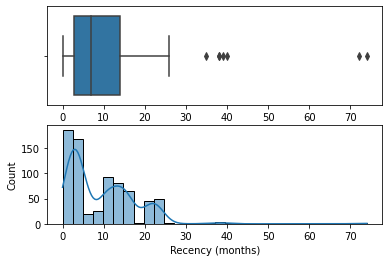

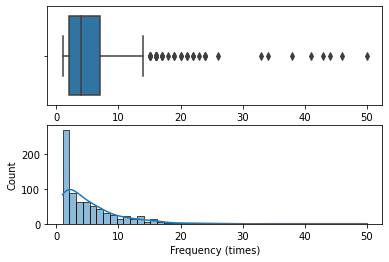

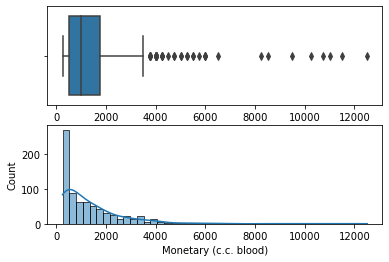

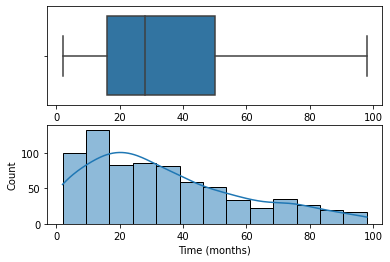

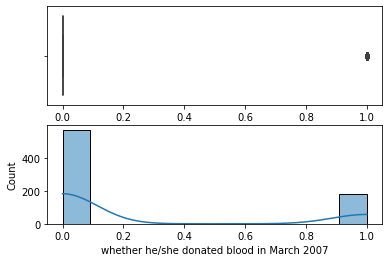

In [8]:

for i in data.columns:
    fig, axs = plt.subplots(2)
    ax_box = axs[0]
    ax_box = sns.boxplot(x = data[i], ax = ax_box)
    ax_hist = axs[1]
    ax_hist = sns.histplot(x = data[i], ax = ax_hist, kde = True)
    plt.show()

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

Input variables = everything except whether the individual has donated blood <br>
Output variable = whether the individual has donated blood <br>
Modelling  = supervised <br>
Modelling type = classification (binary) 


# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [11]:
X = data.drop(columns =['whether he/she donated blood in March 2007'])
Y = data['whether he/she donated blood in March 2007']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33)

In [12]:
print(f'X_train size = {len(X_train)}')
print(f'X_test size = {len(X_test)}')
print(f'y_train size = {len(y_train)}')
print(f'y_test size = {len(y_test)}')

X_train size = 501
X_test size = 247
y_train size = 501
y_test size = 247


# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [14]:
#base model
model = RandomForestClassifier()

# Step 9: Fit the Model

In [15]:
model.fit(X_train, y_train)

RandomForestClassifier()

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [16]:
y_train_pred = model.predict(X_train)
y_train_pred_prob = model.predict_proba(X_train)

In [17]:
train_tn, train_fp, train_fn, train_tp = metrics.confusion_matrix(y_train, y_train_pred).ravel()
train_cm = pd.DataFrame(index = ['Predicted Positive', 'Predicted Negative'], columns = ['Actual Positive', 'Actual Negative'])
train_cm.iloc[0,0] = train_tp
train_cm.iloc[0,1] = train_fp
train_cm.iloc[1,0] = train_fn
train_cm.iloc[1,1] = train_tn
train_cm

,Actual Positive,Actual Negative
Predicted Positive,105,6
Predicted Negative,28,362


In [18]:
accuracy_score = metrics.accuracy_score(y_train, y_train_pred)
accuracy_score

0.9321357285429142

In [19]:
recall_score = metrics.recall_score(y_train, y_train_pred)
recall_score

0.7894736842105263

In [20]:
fpr, tpr, _ = metrics.roc_curve(y_train, y_train_pred)
train_rocauc = metrics.auc(fpr,tpr)

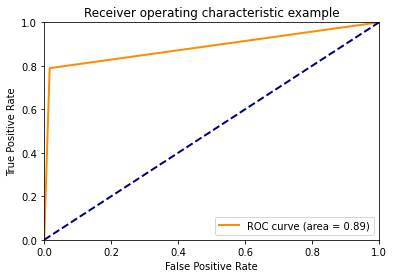

In [21]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % train_rocauc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [22]:
y_test_pred = model.predict(X_test)
y_test_pred_prob = model.predict_proba(X_test)

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

>

>

>



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



